# Fundamental Data Structures and Algorithms 04b - Stack and Queue - Exercise
---

The following problems should help you get familiar with stacks and queue

### Question 4
  
Using pen and paper, determine the contents of the resulting stack `s` or queue `q` based on the pseudocode below.  
  
**(a)**  
```python
s = Stack()
for i in range(24):
    if i % 3 == 0:
        s.push(i)
    elif i % 4 == 0:
        s.pop()
```

**(b)**  
```python
q = Queue()
for j in range(24):
    if j % 3 == 0:
        q.push(j)
    elif i % 4 == 0:
        q.pop()
```

---

### Question 5

In this question we will explore a related application of the stack data structure, which involve testing for pairs of matching symbols.

Consider an arithmetic equation that contains various pairs of grouping symbols, such as
- Parenthesis: **( )**
- Brackets: **\[ ]**
- Braces: **{ }**  

Each opening symbol must match is corresponding closing symbol. For example, a left bracket **[** must match a corresponding right bracket **}** as in the expression $[(a+b)(a-b)]$. The following examples further illustrates this concept:
- Correct: **( )(( )){([( )])}**
- Correct: **((( )(( )){([( )])}))**
- Incorrect: **)(( )){([( )])}**
- Incorrect: **({[ ])}**
- Incorrect: **(**
  
An important task when processing arithmetic expressions is to make sure their symbols match up correctly. You are to implement a function `isMatched` that parses through an expression string and returns True if the symbols match.

In [ ]:
def isMatched(expr):
    # Implement your code here
    

In [ ]:
# Yong Han's Codes

def isMatched(expr):
    # Implement your code here
    EXPR = symbolparse()
    for char in expr:
        EXPR.pushandcheck(char)
    return EXPR.isEmpty()
            
def opp(char):
        if char =='(':
            return ')'
        elif char == '{':
            return '}'
        elif char == '[':
            return ']'
        
class symbol:
    def __init__(self,char):
        self.char = char
        self.nxt = None
    
class symbolparse:
    
    def __init__(self):
        self.top = None
    
    def isEmpty(self):
        return self.top is None
    
    def pushandcheck(self,char):
        if self.top is None:
            temp = symbol(char)
            if temp.char in '[({})]':
                self.top = temp
        else:
            if self.top.char in '[({})]':
                new = symbol(char)
                if new.char in '[({})]':
                    if new.char == opp(self.top.char):
                        self.pop()
                    else:
                        new.nxt = self.top
                        self.top = new
            
    def pop(self):
        if self.isEmpty():
            return None
        out = self.top
        self.top = self.top.nxt
        out.nxt = None
        return out.char

In [7]:
def isMatched(s): # Fail one test case.
            """Checks if a string has balanced parentheses."""
            count = {'{':0,'[':0,'(':0}
            for c in s:
                if c in count:
                    count[c] += 1
                elif c == "]":
                    if count['['] <= 0:
                        return False
                    count['['] -= 1
                elif c == ")":
                    if count['('] <= 0:
                        return False
                    count['('] -= 1
                elif c == "}":
                    if count['{'] <= 0:
                        return False
                    count['{'] -= 1
            for ch in count:
                if count[ch] != 0:
                    return False
            return True

In [ ]:
def isMatched(expr): # Zahiri Solution!
    # Implement your code here
    l = '({['  # opening delimiters
    r = ')}]'  # respective closing delims
    S = []
    for c in expr:
        if c in l:
            S.append(c)  # push left delimiter on stack
        elif c in r:
            if not S:
                return False  # nothing to match with
            if r.index(c) != l.index(S.pop( )): # l and r are the strings '({[',']})' respectively
                # THEY ARE NOT LISTS.
                return False  # mismatched
    return not S  # were all symbols matched?

In [8]:
# Test cases
print(isMatched("[(a+b)(a-b)]"))             # expected output: True
print(isMatched("( )(( )){([( )])}"))        # expected output: True
print(isMatched("((( )(( )){([( )])}))"))    # expected output: True
print(isMatched(")(( )){([( )])}"))          # expected output: False
print(isMatched("({[ ])}"))                  # expected output: False
print(isMatched("("))                        # expected output: False

True
True
True
False
True
False


---

### Question 6

Implement a queue class that maintains the element with the minimum value at the front of the queue.

It needs to support the following methods:
- `enqueue(x)` - enqueues element $x$ onto the queue
- `dequeue()` - dequeues the element with the minimum value from the queue
- any other methods that you may require

(Create your own test cases.)

**Example**
```python
q = MinQueue()
q.enqueue(2)
q.enqueue(1)
q.enqueue(3)
q.dequeue() # should return 1
q.dequeue() # should return 2
```

### Implementation Notes

1. Understand what Structures are required.
2. Understand what Attributes these Structures have.
e.g. Queue needs two pointers, one 'last', one 'first' to denote the start and the end of the queue.
e.g. Node needs 1 pointer, one 'next' to denote the next node in the super-Structure.
3. Understand what Methods these Structures need.
e.g. Queue might need a way to look at who is the next in Queue, first in Queue and how long the Queue is.
4. Most of the Methods which the Structures need are Instance Methods, except general utility methods which are decorated by static method.
5. Methods implementation usually involves the following:

> a. Determine the purpose of the method. Consider what to return for each method and consider what to return for each check.
    
> b. Check for uniqueness and existence. Consider the following heuristics: 
   * for each of the Structures (super or sub), consider the number of their pointer attributes and the cases where it is more than 1, if they will point to the same entity or different.
   * for each of the Structures (super or sub), consider their numbers and pay attention to the cases where it is zero or maximum. <br>e.g. .dequeue() for Queue requires checks for if the Queue is empty.
    
> c. Alter the attributes of sub-Structures before altering the attributes of super-Structures.

## FIRST LAW: Attributes fully define the structure. Methods of a structure are meant manipulate the attributes or to get/set the attributes.<br>Therefore, whenever you reassign the attributes defining the structure, you are changing the structure itself. To merely traverse through the structure, i.e. not intending to change the structure, you have to use a dummy variable.
e.g. Attributes of a Queue are: Nodes, size, front and back. Methods like isEmpty() is a getter, and insert() and delete() are meant to manipulate the attribute Node.

### References
1. Queue Implementation Using Linked-List

https://www.geeksforgeeks.org/queue-linked-list-implementation/

2. Circular Singly-Linked List Queue Implementation

https://www.geeksforgeeks.org/circular-queue-set-1-introduction-array-implementation/

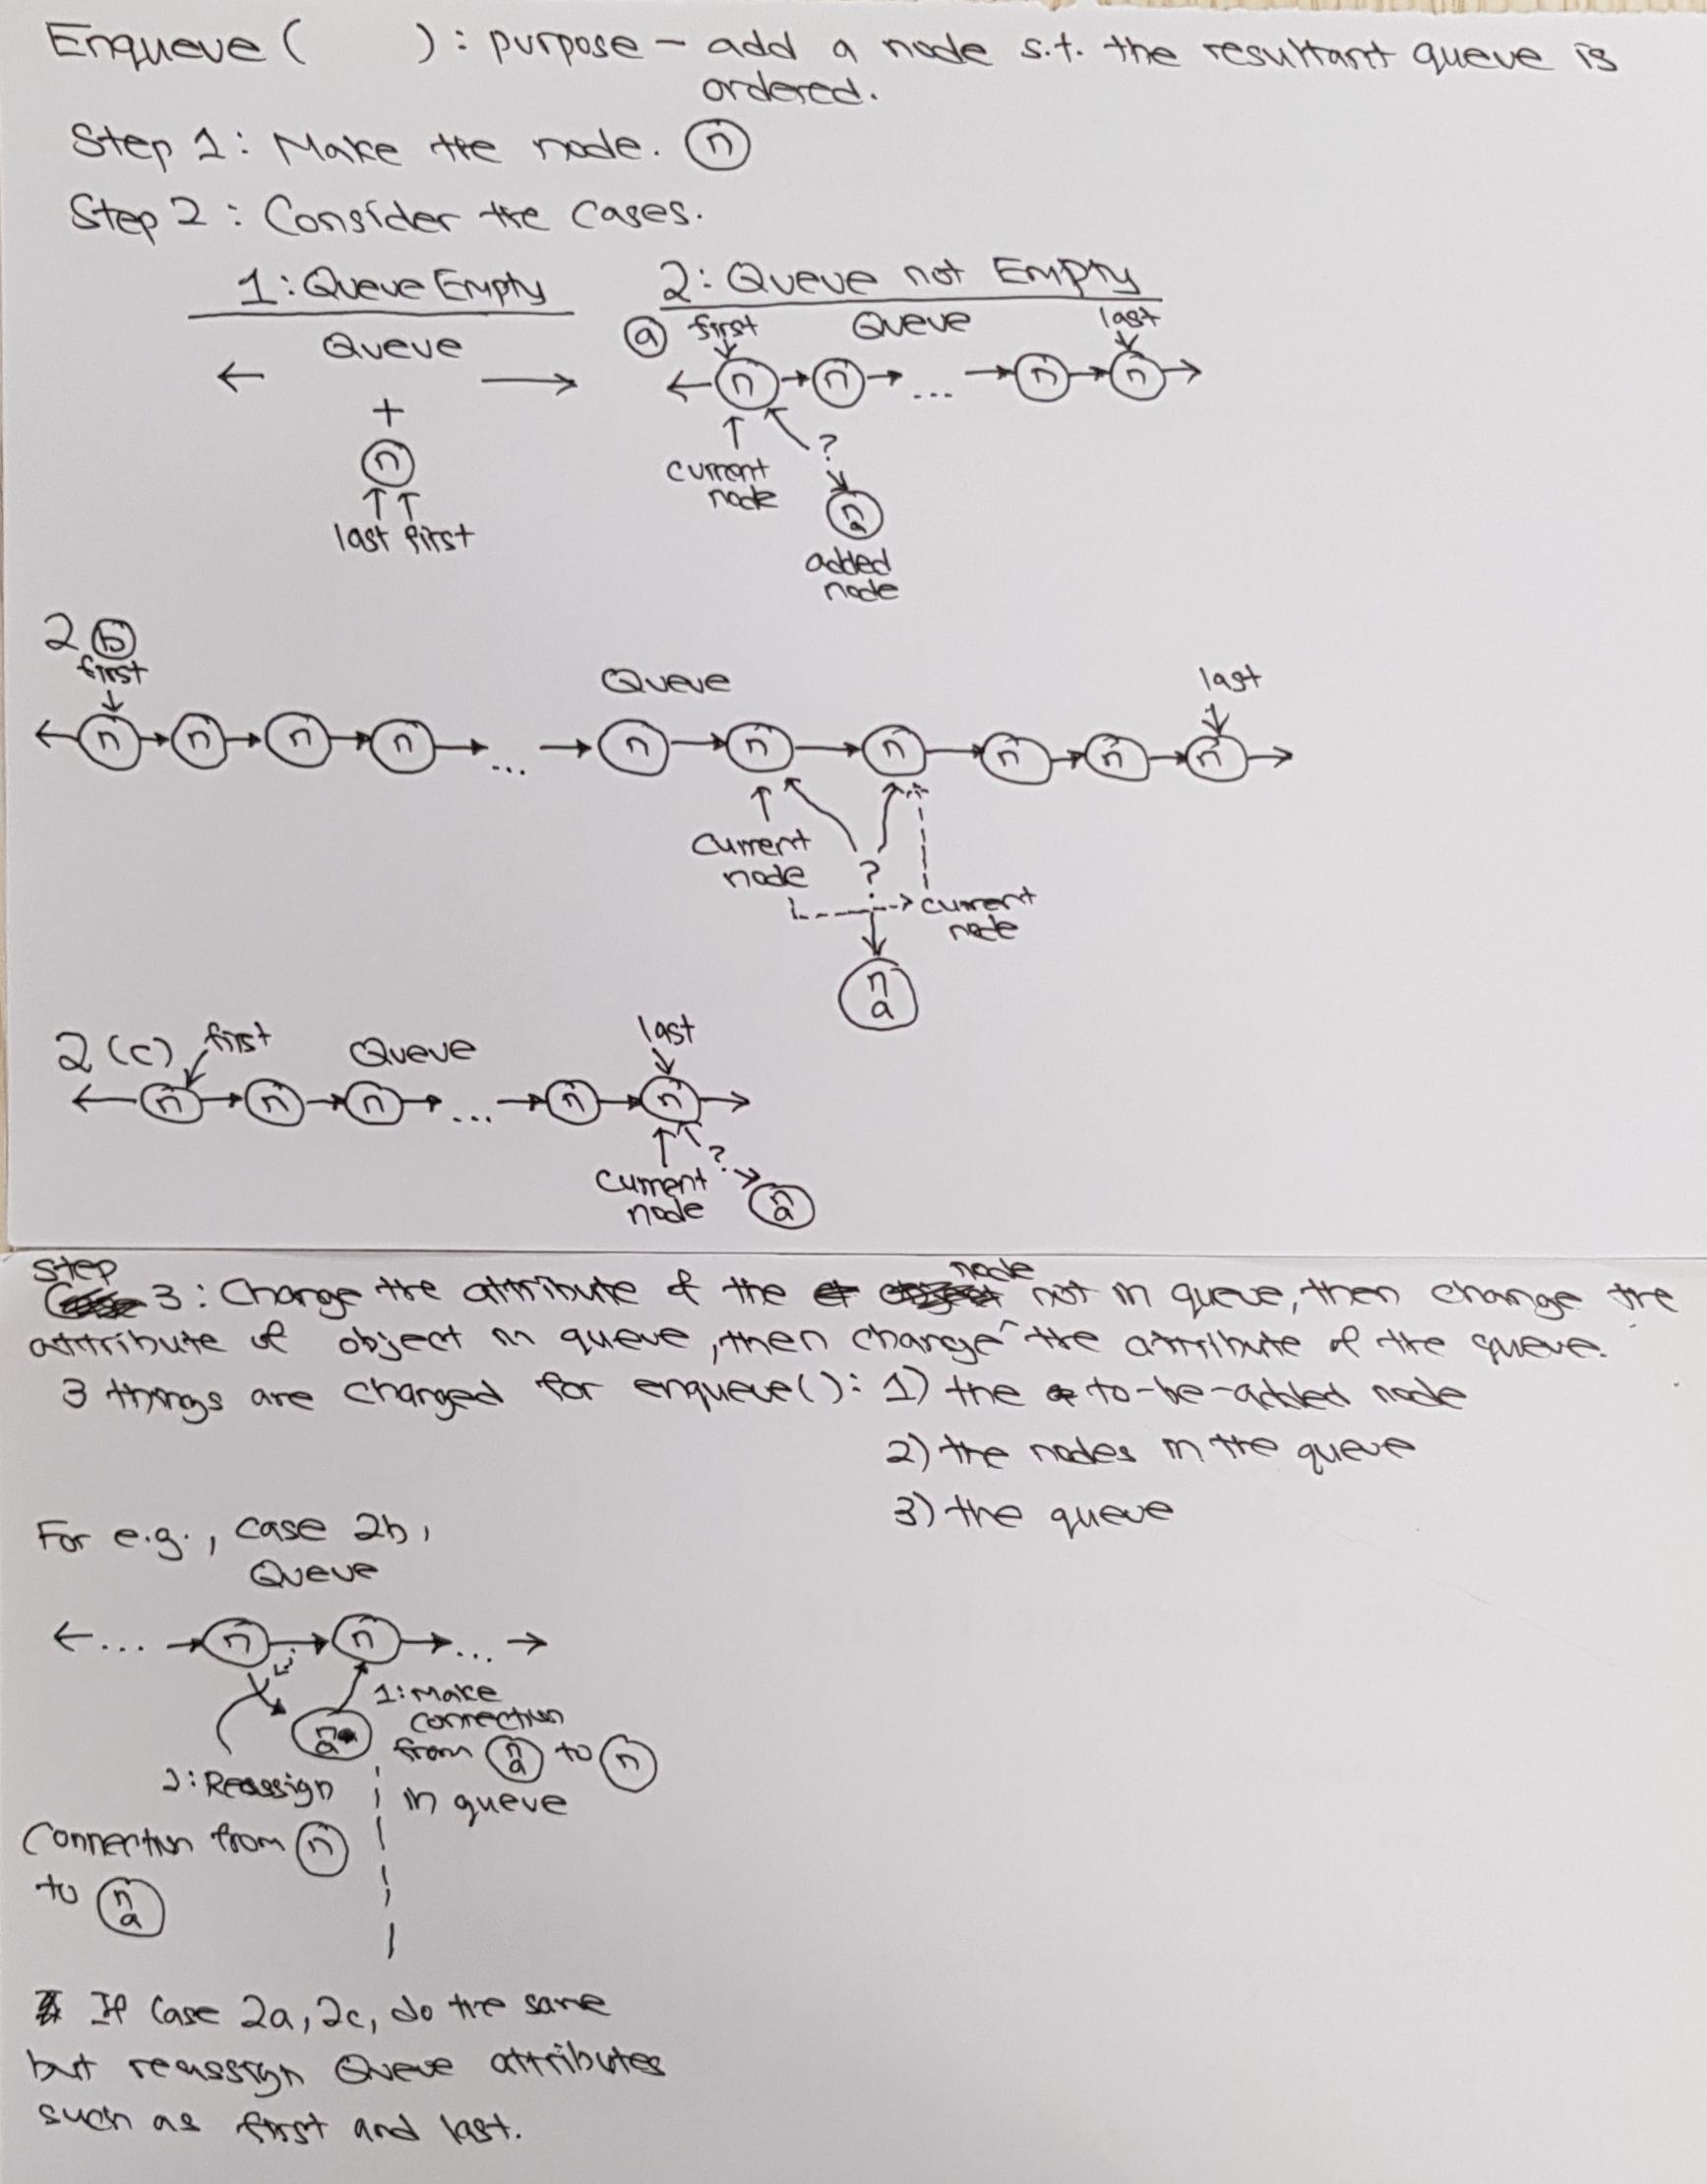

In [55]:
class MinQueue: # If the imposed condition is a condition on the sub-class attribute, 
    # then should not implement an
    # attribute on the super-class to take care of the condition. Should
    # Implement your code here
    
    # THINGS TO CONSIDER:
    # 1) ENQUEUE WHEN QUEUE IS EMPTY.
    # 2) ENQUEUE WHEN QUEUE HAS ONE NODE ONLY.
    # 3) DEQUEUE WHEN QUEUE HAS ONE NODE ONLY.
    class QueueNode:
        def __init__(self, data = None): # Set default value of data = None, sure, must should
            # assign data to self.data
            self.next = None
            self.data = data
            
    def __init__(self):
        self.first = None
        self.last = None
        self.size = 0
        
    def isEmpty(self): 
        return self.first == None
    
    def peek(self): # SHOULD CHECK IF QUEUE IS EMPTY OR NOT!
        if not self.isEmpty():
            return self.first.data
        else:
            return "None"
    
    def enqueue(self, data):
        
        node = MinQueue.QueueNode(data)
        
        if self.isEmpty(): # Case 1: If Queue is empty.
            # MUST NOT DO NOT CAN NOT ESTABLISH THE LINK BETWEEN SELF.FIRST 
            # AND SELF.LAST EVEN THOUGH
            # THERE IS ONLY ONE NODE CURRENTLY IN THE QUEUE!!!
            # BECAUSE IT WILL KICK OFF AN INFINITE LOOP!!!
            self.first = self.last = node
            return
            
        dummynode = self.first
        
        if node.data <= dummynode.data: # Case 2: Insert in front of the queue, should take care of
            # the possibility that the data might be equal
            # MUST ESTABLISH THE LINK BETWEEN SELF.FIRST AND SELF.LAST EVEN THOUGH
            # THERE IS ONLY TWO
            node.next = self.first
            self.first = node
            return
        
        if node.data >= self.last.data: # Case 3: Insert behind the last node. Should take care of
            # the possibility that the data might be equal
            self.last.next = node
            self.last = node
            return
            
        while dummynode.next is not None: # Last case: Insert any possible spot within the Queue
            # if Queue is non-empty. Should make dummynode.next is not None because
            # dummynode is always not None as it is a Node object but the data it contains can
            # be None.
            if dummynode.data <= node.data < dummynode.next.data:
                node.next = dummynode.next
                dummynode.next = node
                return
            else:
                dummynode = dummynode.next
        
    def dequeue(self):
        
        if self.isEmpty():
            return "Queue is empty."
        
        if self.first.next is None: # SHOULD CHECK IF SELF.FIRST.NEXT IS NONE OR NOT AS CONDITION
            # TO DETERMINE IF ONE NODE IS LEFT IN THE QUEUE.
            # ALWAYS DEQUEUE SELF.FIRST, NOT SELF.LAST EVEN IF IT IS THE LAST ONE.
            # STAY LOGICAL!
            node = self.first            
            self.first = self.last = None # Reset the entire Queue.
            return node
        
        node = self.first
        self.first = node.next
        # IF THERE ARE TWO NODES LEFT, SELF.FIRST AND SELF.LAST. WHEN SELF.FIRST IS ASSIGNED
        # TO NODE, THEN SELF.FIRST IS RE-POINT TO NODE.NEXT, NOW THE SECOND NODE I.E. LAST NODE
        # HAS NEXT WHICH IS POINTING TO NONE IMPLIES SELF.FIRST.NEXT IS ALSO NONE
        # AND THIS IS THE CONDITION TO CHECK IF QUEUE ONLY HAS 1 LAST NODE REMAINING.
        return node
    
    def printQueue(self):
        
        if self.isEmpty():
            return "Queue is empty."
        
        node = self.first
        
        while node:
            print(node.data, end = " ")
            node = node.next
            
        return

In [58]:
# Test Cases
print("\n--- Enqueue ---")
nums = [2,5,6,7,3,5,7,8,4] # 2,3,4,5,5,6,7,7,8
q = MinQueue()
for num in nums:
    q.enqueue(num)
    print("\nQueue is empty? ", q.isEmpty())
    print(f"First element of the Queue is {q.peek()}")
    q.printQueue()
    print()

print("\n--- Dequeue ---")
for num in range(len(nums)):
    print(f"\nDequeue is Done! Node removed is: {q.dequeue().data}")
    print("\nQueue is empty? ", q.isEmpty())
    print(f"First element of the Queue is {q.peek()}")
    q.printQueue()
print("\n--- Enqueue Again ---")
for num in nums:
    q.enqueue(num)
    print("\nQueue is empty? ", q.isEmpty())
    print(f"First element of the Queue is {q.peek()}")
    q.printQueue()
    print()
    
print("\n--- Dequeue Again ---")
for num in range(len(nums)):
    print(f"\nDequeue is Done! Node removed is: {q.dequeue().data}")
    print("\nQueue is empty? ", q.isEmpty())
    print(f"First element of the Queue is {q.peek()}")
    q.printQueue()


--- Enqueue ---

Queue is empty?  False
First element of the Queue is 2
2 

Queue is empty?  False
First element of the Queue is 2
2 5 

Queue is empty?  False
First element of the Queue is 2
2 5 6 

Queue is empty?  False
First element of the Queue is 2
2 5 6 7 

Queue is empty?  False
First element of the Queue is 2
2 3 5 6 7 

Queue is empty?  False
First element of the Queue is 2
2 3 5 5 6 7 

Queue is empty?  False
First element of the Queue is 2
2 3 5 5 6 7 7 

Queue is empty?  False
First element of the Queue is 2
2 3 5 5 6 7 7 8 

Queue is empty?  False
First element of the Queue is 2
2 3 4 5 5 6 7 7 8 

--- Dequeue ---

Dequeue is Done! Node removed is: 2

Queue is empty?  False
First element of the Queue is 3
3 4 5 5 6 7 7 8 
Dequeue is Done! Node removed is: 3

Queue is empty?  False
First element of the Queue is 4
4 5 5 6 7 7 8 
Dequeue is Done! Node removed is: 4

Queue is empty?  False
First element of the Queue is 5
5 5 6 7 7 8 
Dequeue is Done! Node removed is: 5

Queu

In [ ]:
# Yong Han's Codes

class QNode:
    def __init__(self,data):
        self.data = data # Any datatype
        self.front = None # Another node
        self.back = None # Another node
        self.nxt = None # Another node

class MinQueue:
    # Implement your code here
    def __init__(self):
        self.front = None # Point to a node
        self.back = None # Point to a node
        self.size = 0 # Measure the size of the Queue
        
    def isEmpty(self):
        return self.front is None
    
    def peek(self):
        if self.isEmpty():
            return None
        return self.front.data
    
    def enqueue(self, data):
        node = QNode(data) # Node is the added node. Creation of the to-be-added node.
        
        ### Case 1: Queue has no node.
        if self.back is None: # If Queue has zero node
            self.front = self.back = node # Queue.front and back point to added node.
            return # Done
        
        currentnode = self.front # If Queue has nonzero nodes, get a dummy variable go traverse through the queue.
        
        # Case 2: Compare with the front of the queue.
        if node.data < currentnode.data: # If added node data < front node data, point added node's next to front note.
            node.nxt = currentnode
            self.front = node # Shift the 'front' pointer to the added node.
            return # Done
        
        # Case 3: Compare in between nodes of the queue sequentially, with both front and back of the queue excluded
        # from the comparison.
        while currentnode.nxt is not self.back: # Traverse through the nodes until meet the back node. Start traversing.
            if currentnode.data <= node.data < currentnode.nxt.data: # If data of the added node is between the data of the 
                # current node and the next node
                node.nxt = currentnode.nxt # Alter the sub-class attribute first, alter the attributes of what is 
                # NOT part of the super-structure first before altering the sub-class that is part of the super-structure.
                currentnode.nxt = node # Traverse to the next node
                break # No longer need to traverse anymore as the added node is inserted.
            else:
                currentnode = currentnode.nxt # If the data of added node is not in between the data of the 
                # current node and the next node
        if currentnode.data <= node.data < self.back.data: # Now current node should point to the node before the back node
            # Check if data of added node is between that data of current node and the back node.
            node.nxt = self.back
            currentnode.nxt = node # Insert the node in between the current node and the back node
        else:
            self.back.nxt = node # Last case: data of added node is the largest, so add to the back.
            self.back = node
    
    def dequeue(self):
        if self.isEmpty(): # To take something out, must make sure there is something inside.
            print('Queue is Empty')
            return
        node = self.front # Taking out the node from the front of the queue by assigning front to node. Inner class attribute.
        self.front = node.nxt # Assigning the second node to be the front node. Alter outer class attribute.
        if self.front is None: # If only removing one node, then there is nothing left.
            self.back = None
        return node.data